In [66]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

## **Understanding the decline in male college enrollment**
#### *Ravan Hawrami & Ben Smith [The American Institute for Boys and Men]*

It's important to understand the exact question we're trying to answer: 

*"I have some follow up questions about the data and how we could potentially find the state/town where the number of men enrolled in college is dropping the most...We are interested in understanding what metrics/data we should be looking at if we want to figure out the place that has seen the biggest decline in men enrolling in college. Based on this [pew research report](https://www.pewresearch.org/short-reads/2023/12/18/fewer-young-men-are-in-college-especially-at-4-year-schools/) about a million fewer men are in college since 2011. We are interested in learning what places are suffering the most from the male decline in college enrollment, and just what metrics overall we should be looking for when thinking about this issue."* 

We should first note that the decline in college enrollment since 2011 is dependent on the level of undergraduate institution. Let's first look at overall numbers. I use the NCES for this, which has *"Total undergraduate fall enrollment in degree-granting postsecondary institutions"*.

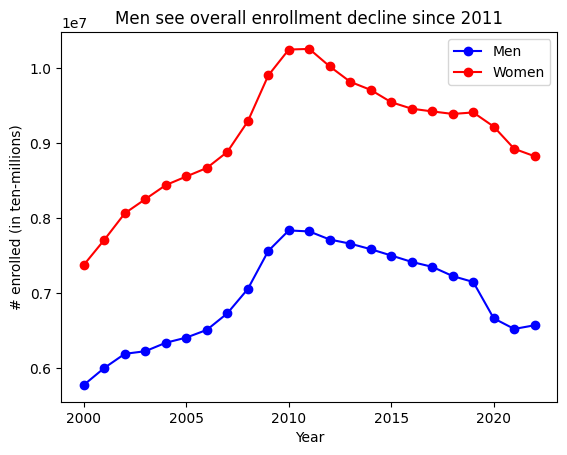

In [67]:
#Load in undergraduate enrollment by gender (NCES table 303.70)
enrollment = pd.DataFrame(pd.read_excel("tabn303.70.xlsx", sheet_name="by_level"))

#get only years after 2000
enrollment = enrollment.query("year >= 2000")
#Plot enrollment over time, by gender 
l1 = plt.plot(enrollment.year, enrollment.men_overall, color = "blue", marker = "o", label = "Men")
l2 = plt.plot(enrollment.year, enrollment.women_overall, color = "red", marker = "o", label = "Women")

plt.title("Men see overall enrollment decline since 2011")
plt.xlabel("Year")
plt.ylabel("# enrolled (in ten-millions)")
plt.legend()

Now let's look at the decline by level of institution, specifically two-year versus four-year institutions. As seen below, there is a *decline* in male enrollment at two-year undergraduate colleges, but *stagnation* at the four-year level.

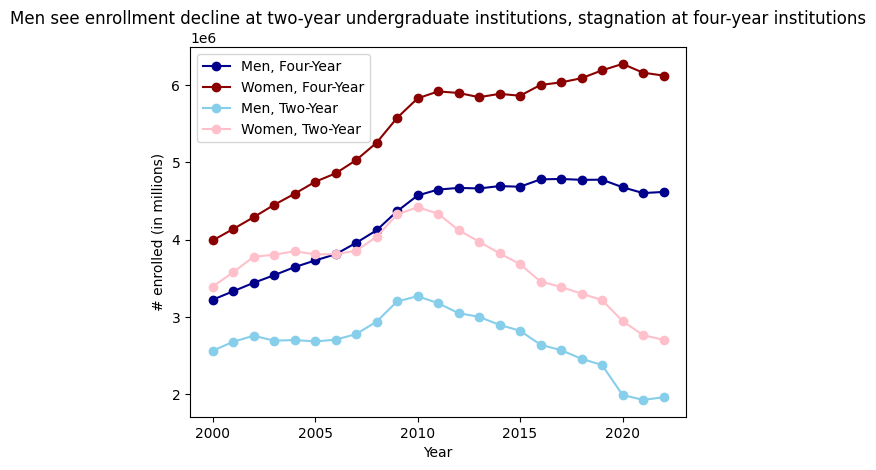

In [68]:
#enrollment by gender and level of institution
l3 = plt.plot(enrollment.year, enrollment.men_4year, color = "darkblue", marker = "o", label = "Men, Four-Year")
l4 = plt.plot(enrollment.year, enrollment.women_4year, color = "darkred",marker = "o", label = "Women, Four-Year")
l4 = plt.plot(enrollment.year, enrollment.men_2year, color = "skyblue",marker = "o", label = "Men, Two-Year")
l5 = plt.plot(enrollment.year, enrollment.women_2year, color = "pink",marker = "o", label = "Women, Two-Year")

plt.title("Men see enrollment decline at two-year undergraduate institutions, stagnation at four-year institutions")
plt.xlabel("Year")
plt.ylabel("# enrolled (in millions)")
plt.legend()




## **Geography**

If we want to look at geographical regions that have seen the largest declines in, we have to consider a couple important points. 

1. *Some people move for college.* From a basic google search, it looks like about [one-in-five people](https://blog.hireahelper.com/the-schools-with-the-biggest-pull-a-study-of-moving-for-college-in-the-us/#:~:text=Migration%20of%20the%20Minds%3A%20States,did%20so%20the%20year%20prior.) enrolled in college leave their home state. I assume the number of people who leave their home county is higher than this. While one-in-five is relatively small, it's still something.
2. More importantly, the variable we use to measure male enrollment matters a lot. We could use:
 - the current number of men enrolled in college at the state level, and look at absolute declines
 - the share of men within a certain age range (18-24 would be good, assuming a 6-year graduation timeline) enrolled in college at the state level

What are we interested in? And (more importantly) of course, what can we do with the data available. 

### Male Enrollment, by College Locations

Let's first take a brief look at the number of men enrolled in undergraduate institutions, grouped at the state level. I used the [NCES IPEDS Data Trends Generator](https://nces.ed.gov/ipeds/trendgenerator/) to do this. Below, I look at the rate-of-change in men enrolled in college in each state, from 2001-2022 and 2011-2022. For now, lets just look at 2001-2022. 

Look at the *"roc_01to22"* column, which shows the percent change (scaled 0-1, just move the decimal over two places) in male enrollment in undergraduate colleges, grouped by where that college is located. For example, even if a male student is enrolled at UCLA, but he was born in Nebraska, he would be counted toward the California male enrollment numbers.

The top five states/jurisdictions with the least growth in male undergraduate enrollment (2001-2022) are: 
1. Alaska (36% decrease)
2. Illinois (28% decrease)
3. Michigan (28% decrease)
4. Hawaii (26% decrease)
5. Washington D.C. (21% decrease)

In [69]:
#IPEDS NCES Male Enrollment by State
enroll_state = pd.DataFrame(pd.read_excel("NCES_IPEDS_EnrollUndergrad_bystate.xlsx", sheet_name="men"))

#clean up year column
enroll_state["Year"] = enroll_state["Year"].astype(str)
enroll_state["Year"] = enroll_state["Year"].str.replace("-.+", "", regex=True)
enroll_state["Year"] = enroll_state["Year"].astype(int)

#transpose table to get roc
enroll_state_trans = enroll_state.transpose()
enroll_state_trans.columns = enroll_state_trans.iloc[0]
enroll_state_trans = enroll_state_trans.drop( "Year")
enroll_state_trans = enroll_state_trans.add_prefix("male_", axis=1)

#Calculate rates of change, from 2001-2022 and 2011-2022
#2011-2022
enroll_state_trans["roc_11to22"] = (enroll_state_trans.male_2022 - enroll_state_trans.male_2011) / enroll_state_trans.male_2011
#2001-2022
enroll_state_trans["roc_01to22"] = (enroll_state_trans.male_2022 - enroll_state_trans.male_2001) / enroll_state_trans.male_2001

#Let's look at the states with the greatest relative drop in #men enrolled in college
print("STATE-LEVEL MALE ENROLLMENT NUMBERS (2001-2022), AND CHANGE:")
enroll_state_trans[["male_2001", "male_2022", "roc_01to22"]].sort_values(by = "roc_01to22", ascending=True)







STATE-LEVEL MALE ENROLLMENT NUMBERS (2001-2022), AND CHANGE:


Year,male_2001,male_2022,roc_01to22
Alaska,21138,13443,-0.364036
Illinois,459145,330329,-0.280556
Michigan,303784,219154,-0.278586
Hawaii,34508,25663,-0.256317
District of Columbia,29583,23388,-0.209411
Missouri,166103,132548,-0.202013
Washington,208324,167968,-0.193717
New Mexico,63187,50970,-0.193347
Louisiana,115224,96222,-0.164914
Minnesota,160653,138350,-0.138827


### Share of Men Enrolled in College, by State

What if we wanted to look at the share of men enrolled in college over time? For example, what if we wanted to know how the share of men, aged 18-24, enrolled in college and by location has changed over the past twenty years. A solid source for this would/could be:
- Decennial Census
- Census American Community Survey (ACS)
- Current Population Survey (CPS)

A couple notes on the above:
- All can be accessed through IPUMS fairly easily
- The CPS should not be used for county-level estimates

Given that that Pew report you mentioned used the CPS via IPUMS, let's try that first.

### IPUMS CPS
I'm going to pull an extract from [IPUMS CPS](https://cps.ipums.org/cps/) to look at male enrollment at the state level. Here are my specifications for this extract:
- Like them I'll look at the October CPS data, and I'll look at 2001-2024
- I'll look at the 18-24 year-old population
- My key variables will be: age, sex, college attendance and state of residence

In [70]:
#CPS data on enrollment 
cps = pd.DataFrame(pd.read_csv("cps.csv.gz", delimiter=","))

In [76]:
#Codes for variables of interest
# STATEFIP : 1-56 are U.S. States
# SEX: 1 for Males
# SCHLCOLL : 3-4 are In College

#Drop anyone not in 18-24 y.o. range, and male
cps1 = cps.query("AGE >= 18 and AGE <= 24 and SEX == 1")
#Make sure state and college attendace variables aren't NIU
cps1 = cps1.query("SCHLCOLL > 0 and STATEFIP <= 56")

#In college
in_college = cps1.query("SCHLCOLL == 3 or SCHLCOLL == 4")
in_college = in_college.loc[:, ["STATEFIP", "YEAR", "WTFINL"]].groupby(["STATEFIP", "YEAR"]).sum()
in_college = in_college.rename(columns={"WTFINL" : "incollege"})

#Not in college
notin_college = cps1.query("SCHLCOLL != 3 and SCHLCOLL != 4")
notin_college = notin_college.loc[:, ["STATEFIP", "YEAR", "WTFINL"]].groupby(["STATEFIP", "YEAR"]).sum()
notin_college = notin_college.rename(columns={"WTFINL" : "notincollege"})

#Merge, calculate share of men 18-24 y.o. in college, by year and state
cps_shareincoll = in_college.merge(right=notin_college, on=["STATEFIP", "YEAR"])
cps_shareincoll["share"] = cps_shareincoll.incollege / (cps_shareincoll.incollege + cps_shareincoll.notincollege)

Let's plot out one state to show the data we have. As from earlier, we know Illinois and Michigan saw a drop in their male college enrollment, so let's see if that's also the case here.

Text(0, 0.5, 'Share of men 18-24 in college')

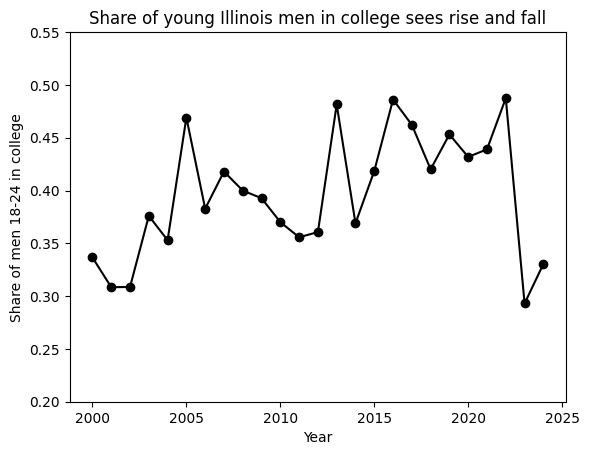

In [78]:
#Illinois & Michigan Male Enrollment
#Illinois STATEFIP CODE = 17
#Michigan STATEFIPS CODE = 26
cps_illinois = cps_shareincoll.query("STATEFIP == 17")
cps_illinois = cps_illinois.reset_index()

cps_michigan = cps_shareincoll.query("STATEFIP == 26")
cps_michigan = cps_michigan.reset_index()

#Plot
plt.plot(cps_illinois.YEAR, cps_illinois.share, color = "black", marker = "o")
plt.ylim(.2, .55)
plt.title("Share of young Illinois men in college sees rise and fall")
plt.xlabel("Year")
plt.ylabel("Share of men 18-24 in college")



Text(0, 0.5, 'Share of men 18-24 in college')

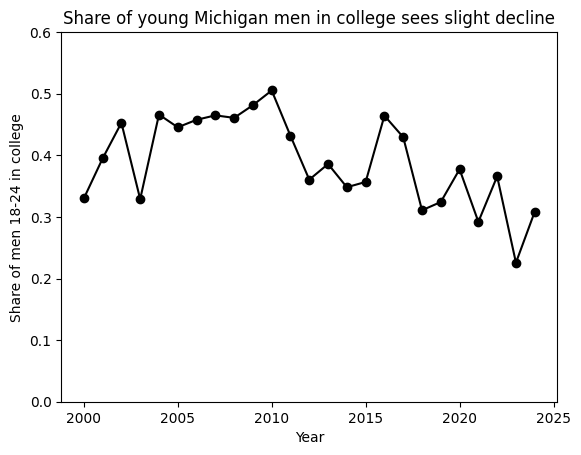

In [79]:
#Plot
plt.plot(cps_michigan.YEAR, cps_michigan.share, color = "black", marker = "o")
plt.ylim(0, .6)
plt.title("Share of young Michigan men in college sees slight decline")
plt.xlabel("Year")
plt.ylabel("Share of men 18-24 in college")

We can also look at a later age-span, and see how many of those men have a college degree. Let's look at West Virginian men, aged 25-29 and with college degrees.

In [89]:
#Try 25-29 with a degree
#EDUC CODE for BA and above: 110-125

#Drop anyone not in 18-24 y.o. range, and male
cps_deg = cps.query("AGE >= 25 and AGE <= 29 and SEX == 1")
#Make sure state and EDUC variables aren't NIU
cps_deg = cps.query("SCHLCOLL != 999 and STATEFIP <= 56")

#In college
yes_deg = cps_deg.query("EDUC >= 110 and EDUC <= 125")
yes_deg = yes_deg.loc[:, ["STATEFIP", "YEAR", "WTFINL"]].groupby(["STATEFIP", "YEAR"]).sum()
yes_deg = yes_deg.rename(columns={"WTFINL" : "has_degree"})

#Not in college
no_deg = cps_deg.query("EDUC >= 2 and EDUC < 110")
no_deg = no_deg.loc[:, ["STATEFIP", "YEAR", "WTFINL"]].groupby(["STATEFIP", "YEAR"]).sum()
no_deg = no_deg.rename(columns={"WTFINL" : "no_degree"})

#Merge, calculate share of men 18-24 y.o. in college, by year and state
cps_sharewithdeg = yes_deg.merge(right=no_deg, on=["STATEFIP", "YEAR"])
cps_sharewithdeg["share"] = cps_sharewithdeg.has_degree / (cps_sharewithdeg.has_degree + cps_sharewithdeg.no_degree)


Text(0, 0.5, 'Share of men 25-29 with degree')

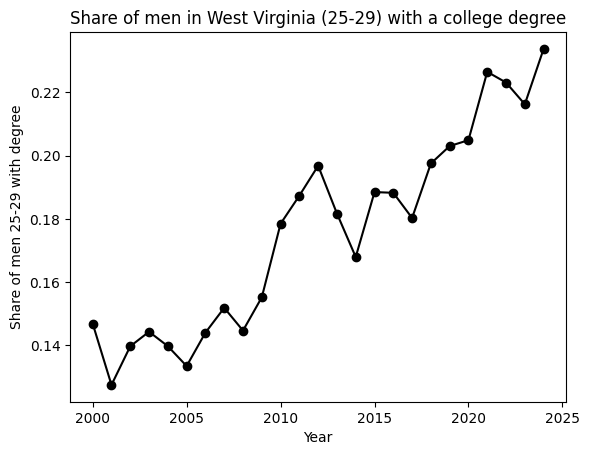

In [91]:
#Try West Virginia for example:
#WV FIP code = 54
cps_deg_wv = cps_sharewithdeg.query("STATEFIP == 54")
cps_deg_wv = cps_deg_wv.reset_index()

#Plot
plt.plot(cps_deg_wv.YEAR, cps_deg_wv.share, color = "black", marker = "o")
plt.title("Share of men in West Virginia (25-29) with a college degree")
plt.xlabel("Year")
plt.ylabel("Share of men 25-29 with degree")

## **Closing notes for now**

I didn't get through all my thoughts in this short notebook, but I think the general takeaways should be:

- Decide on what measure you want to look at to see the "decline". Is it the absolute number of men in college? The share of men in college? The share of men with a degree?
- You have three solid data sources to choose from in my opinion: ACS, CPS and NCES. 
- For geography, only the ACS could provide semi-confident estimates at the county level. The state-level estimates should be fine using any of the three.